<a href="https://colab.research.google.com/github/vipin-jangra/machine_leaning/blob/main/profit_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset = pd.read_csv('regression_problem.csv')


In [3]:
dataset.head()

,Employees,Products,Clients,Turnover,Atrition,Profit
0,1567,9,15,31470.06,3.35,8147.66
1,1675,10,8,41895.10,12.78,4520.65
2,1395,5,13,32372.37,17.50,6653.68
3,1165,1,9,29595.66,5.15,3949.12
4,35,2,12,815.01,10.17,-866.69


In [18]:
dataset.isnull().sum()

Employees    0
Products     0
Clients      0
Turnover     0
Atrition     0
Profit       0
dtype: int64

In [44]:
X = np.array(dataset.iloc[:,0])
y= np.array(dataset.iloc[:, 5])

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [61]:
y_train.shape

(70,)

In [62]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

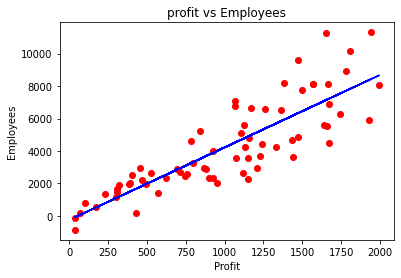

In [63]:
import matplotlib.pyplot as plt
#visualization training set
train_plt = plt
train_plt.scatter(X_train,y_train,color='red')
train_plt.plot(X_train,regression.predict(X_train.reshape(-1,1)),color='blue')
train_plt.title('profit vs Employees')
train_plt.xlabel('Profit')
train_plt.ylabel('Employees')
train_plt.show()


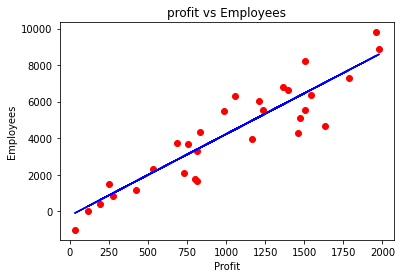

In [65]:
#visualizing test set
test_plt=plt
test_plt.scatter(X_test,y_test,color='red')
test_plt.plot(X_test,regression.predict(X_test.reshape(-1,1)),color='blue')
train_plt.title('profit vs Employees')
train_plt.xlabel('Profit')
train_plt.ylabel('Employees')
test_plt.show()

In [67]:
regression.score(X_test.reshape(-1,1),y_test)

0.8399884070559183

In [70]:
#@title Multivariate

X = dataset.iloc[:, :-1].values
y = dataset['Profit']

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((70, 5), (30, 5), (70,), (30,))

In [72]:
from sklearn.linear_model import LinearRegression
regressoion = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [76]:
#training model score
regression.score(X_train,y_train)

0.7793961028895533

In [77]:
#test model score
regression.score(X_test,y_test)

0.8126065753745046

In [79]:
predictions = regression.predict(X_train)

Text(0, 0.5, 'Predicted')

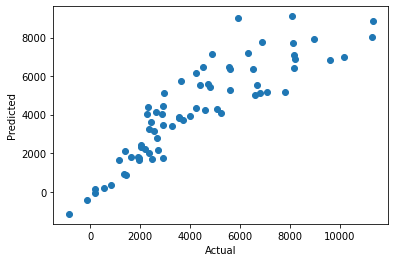

In [82]:
plt.scatter(y_train,predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [111]:
#@title Polynomial

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [112]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


In [117]:
X_train_poly

array([[1.06900000e+03, 1.00000000e+01, 1.50000000e+01, ...,
        7.08580211e+08, 4.57849724e+04, 2.95840000e+00],
       [3.04000000e+02, 1.80000000e+01, 1.20000000e+01, ...,
        4.04764437e+07, 3.49916050e+03, 3.02500000e-01],
       [3.80000000e+01, 6.00000000e+00, 9.00000000e+00, ...,
        7.74734436e+05, 3.64398660e+03, 1.71396000e+01],
       ...,
       [1.23800000e+03, 1.30000000e+01, 2.00000000e+00, ...,
        8.23153397e+08, 3.90192840e+04, 1.84960000e+00],
       [1.65800000e+03, 1.10000000e+01, 2.00000000e+00, ...,
        1.32554392e+09, 3.44783949e+05, 8.96809000e+01],
       [1.10400000e+03, 3.00000000e+00, 5.00000000e+00, ...,
        8.97953365e+08, 1.60317404e+05, 2.86225000e+01]])

In [113]:
regression.fit(X_train_poly,y_train)

LinearRegression()

In [114]:
poly_prediction = regression.predict(X_train_poly)
poly_prediction

array([5732.4159965 , 1485.74232559,  -84.44094217, 2495.70752649,
       8337.48712293, 2895.20981652, 3044.79938435, 2038.73295112,
       9022.33088827, 9063.39649074, 5816.01417773, 2379.73708155,
       7147.43745028, 6595.22702894, -197.15027365, 7375.07242283,
       1238.24022202,  885.77512286, 8155.05579837, 3894.2083485 ,
       7146.35745532, 6208.46012486, 7594.63270103, 3449.97979528,
       3205.66742387, 5096.54281534, 4095.39722062, 1698.23703776,
       2349.26259578,  513.75353733, 5128.3975212 , 1441.32054148,
       4563.36846073, 8343.82003072, 5209.94498578,  532.18208848,
       2990.5773548 ,  917.43517673,  559.62562986, 3094.89731478,
       3385.95445927, 6178.15645474, 3818.60845703,  897.12166525,
       2276.31895623, 3924.06374313, 9559.99928837, 1788.37691666,
       5628.69743098, -390.34627956, 2711.27814402, 6633.10824629,
       7882.35759396, 4599.79927652, 4101.36952907, 6478.9881819 ,
       8942.83706983, 4767.89893899, 6767.92338178, 3184.98105

In [119]:
regression.score(X_test_poly,y_test)

0.7520291741020794